# Avaliação 2

### Questão 3
Utilizando a base (https://www.kaggle.com/thesiff/premierleague1819) execute os algoritmos de clusterização citados a seguir e compare os resultados.
* Execute os algoritmos de agrupamento K-Means e Hierárquico;
* Escolha 5 diferentes valores de K;
* Varie o parâmetro (teste 2 tipos) de Linkage do Hierárquico com os mesmos valores de K escolhidos anteriormente;
* Faça uma comparação entre os 2 resultados anteriores, utilizando uma medida de avaliação própria para clusterização. 

__OBS__: Utilize validação cruzada com 10 folds estratificada e fixe o random_state.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import nltk
from sklearn.metrics import silhouette_samples, silhouette_score, v_measure_score
from sklearn.datasets import load_files
from sklearn.datasets import make_blobs
import re
from mpl_toolkits import mplot3d
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

df_pl = pd.read_csv("data/q2_epl_1819.csv",sep=",")
df_tr = pd.read_csv("data/q2_transfer.csv",sep=",")

In [2]:
df_pl

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,...,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,...,58,63,362,518,0,543,295,4,64.0,89.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,...,76,78,314,610,2,639,317,1,58.8,84.4
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,...,85,73,351,618,2,593,330,2,59.9,87.6
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,...,121,112,326,626,3,770,411,5,56.7,83.2
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,...,133,118,412,609,2,762,404,7,56.1,83.3
5,Manchester United,Europa League,6,27,142512868,38,19,9,10,65,...,122,128,355,581,2,785,370,6,53.3,82.3
6,Wolverhampton,Europa League Qualification,7,15,127165114,38,16,9,13,47,...,100,148,501,720,2,824,464,4,47.4,78.2
7,Everton,No UEFA Competitions,8,18,128603905,38,15,9,14,54,...,94,85,456,700,4,825,430,5,51.0,77.3
8,Leicester,No UEFA Competitions,9,15,123328078,38,15,7,16,51,...,90,96,436,676,4,945,500,5,50.8,79.2
9,West Ham,No UEFA Competitions,10,16,122528663,38,15,7,16,52,...,148,141,457,723,5,855,397,5,49.0,78.7


In [3]:
df_tr

,team,end_2019,end_2018,end_2017,end_2016,end_2015,end_2014,end_2013,end_2012,end_2011,end_2010,Total
0,Manchester City,-22.99,-226.15,-178.15,-140.86,-57.68,-104.70,-17.65,-59.85,-146.46,-116.35,-1070.83
1,Manchester United,-52.15,-152.90,-137.85,-53.93,-146.06,-75.33,-65.57,-47.84,-11.99,77.07,-666.55
2,Tottenham,5.35,-17.70,-31.30,16.58,-4.32,13.55,-0.47,33.80,-23.67,-8.60,-16.78
3,Liverpool,-143.70,20.62,5.48,-34.85,-52.16,-25.50,-60.15,-43.63,3.98,5.05,-324.86
4,Chelsea,-148.25,-60.00,-24.40,-3.01,7.15,-52.92,-84.25,-64.05,-105.00,-26.20,-560.93
5,Arsenal,-75.10,3.35,-102.65,-24.00,-91.18,-37.10,9.85,12.82,-13.40,35.70,-281.72
6,Burnley,-25.00,14.26,-44.40,-5.01,-12.62,4.65,6.35,2.72,0.88,-13.45,-71.63
7,Everton,-71.15,-76.72,-25.10,-37.90,-38.26,14.30,-2.90,19.60,4.90,5.04,-208.19
8,Leicester,-18.80,-39.95,-25.55,-40.45,-22.86,0.65,-1.72,-16.71,-2.50,-0.81,-168.69
9,Newcastle United,-16.27,-24.78,37.13,-103.28,-21.41,22.07,-17.17,-10.01,27.77,20.79,-85.16


In [4]:
kmeans = KMeans(init="random", n_clusters=3,n_init=10,max_iter=300,random_state=42)

In [5]:
df = df_pl.drop(columns=['Team','category'])
df['defence_clearances']

0       543
1       639
2       593
3       770
4       762
5       785
6       824
7       825
8       945
9       855
10      956
11      940
12    1,120
13    1,019
14    1,080
15    1,068
16      921
17      978
18      971
19      658
Name: defence_clearances, dtype: object

In [6]:
#df = df_pl.drop(columns=['Team','category'])

for i in df['attack_passes']:
    df['attack_passes'] = df['attack_passes'].replace(i,float(i.replace(',','')))
for i in df['attack_passes_long']:
    df['attack_passes_long'] = df['attack_passes_long'].replace(i,float(i.replace(',','')))
for i in df['attack_passes_back']:
    df['attack_passes_back'] = df['attack_passes_back'].replace(i,float(i.replace(',','')))
for i in df['defence_clearances']:
    i = str(i)
    df['defence_clearances'] = df['defence_clearances'].replace(i,float(i.replace(',','')))

df['attack_passes']

0     26581.0
1     23638.0
2     25070.0
3     21295.0
4     20805.0
5     19202.0
6     16618.0
7     16494.0
8     17219.0
9     16358.0
10    15462.0
11    15243.0
12    13490.0
13    15943.0
14    13011.0
15    14297.0
16    14109.0
17    10226.0
18    17699.0
19    15902.0
Name: attack_passes, dtype: float64

In [7]:
df['attack_passes_long']

0     1814.0
1     2250.0
2     1774.0
3     2267.0
4     2062.0
5     2242.0
6     2552.0
7     2310.0
8     2335.0
9     2315.0
10    2437.0
11    2259.0
12    2680.0
13    1932.0
14    2898.0
15    2394.0
16    2623.0
17    2513.0
18    2417.0
19    2603.0
Name: attack_passes_long, dtype: float64

In [8]:
df['attack_passes_back']

0     4240.0
1     3416.0
2     3874.0
3     3191.0
4     3102.0
5     2634.0
6     2515.0
7     2362.0
8     2593.0
9     2273.0
10    2314.0
11    2233.0
12    1999.0
13    2249.0
14    2046.0
15    2040.0
16    2072.0
17    1418.0
18    2750.0
19    2492.0
Name: attack_passes_back, dtype: float64

In [9]:
df['defence_clearances']

0      543.0
1      639.0
2      593.0
3      770.0
4      762.0
5      785.0
6      824.0
7      825.0
8      945.0
9      855.0
10     956.0
11     940.0
12    1120.0
13    1019.0
14    1080.0
15    1068.0
16     921.0
17     978.0
18     971.0
19     658.0
Name: defence_clearances, dtype: float64

In [10]:
scaler = StandardScaler()


scaled_features = scaler.fit_transform(df)

In [11]:
kmeans.fit(scaled_features)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [12]:
kmeans.cluster_centers_

array([[-1.38737595e+00,  1.43198875e+00,  1.45687623e+00,
         0.00000000e+00,  1.56352705e+00, -8.80365797e-01,
        -1.35470068e+00,  1.41367784e+00, -1.48822832e+00,
         1.51339656e+00,  1.51644395e+00, -1.42277598e-01,
        -2.62346007e-01,  1.38597974e-01,  1.68562972e+00,
         1.69010937e+00,  1.64288452e+00,  1.58816768e+00,
        -1.10832759e+00,  1.64435881e+00,  5.85502312e-01,
         1.28776891e+00,  1.55664635e+00,  1.37496833e+00,
         1.02988981e+00,  2.21601315e-01,  1.36528376e+00,
         8.61967001e-01, -1.39451897e+00, -6.12240045e-01,
         3.79389020e-01,  3.15905578e-01, -1.13940757e+00,
        -1.27691927e+00, -1.31461676e+00, -8.36517144e-01,
        -7.91039852e-01, -1.39770855e+00, -1.10623983e+00,
        -1.14294690e+00,  1.58289052e+00,  1.35371588e+00],
       [ 1.12724296e+00, -6.24590838e-01, -9.60749784e-01,
         0.00000000e+00, -9.59812234e-01, -1.11792482e-01,
         1.06711059e+00, -1.03707558e+00,  8.72746586e-

In [13]:
kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
}

sse = []
for k in range(1, 11):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(scaled_features)
     sse.append(kmeans.inertia_)

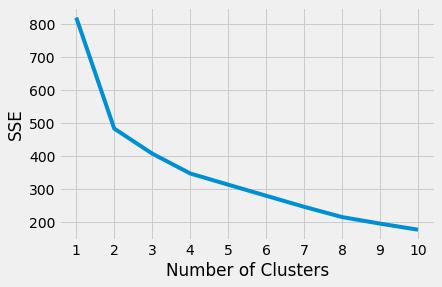

In [14]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [15]:
kl = KneeLocator(
     range(1, 11), sse, curve="convex", direction="decreasing"
)
kl.elbow

3

In [16]:
silhouette_coefficients = []

for k in range(3, 5):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(scaled_features)
     score = silhouette_score(scaled_features, kmeans.labels_)
     silhouette_coefficients.append(score)

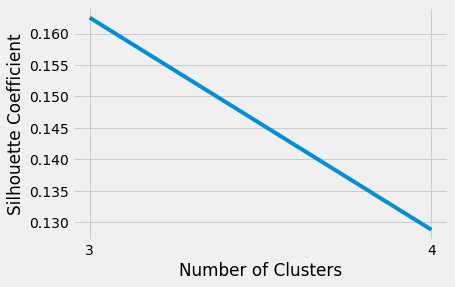

In [17]:
plt.style.use("fivethirtyeight")
plt.plot(range(3, 5), silhouette_coefficients)
plt.xticks(range(3, 5))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [18]:
kmeans_silhouette = silhouette_score(
     scaled_features, kmeans.labels_
).round(2)

In [19]:
kmeans_silhouette

0.13

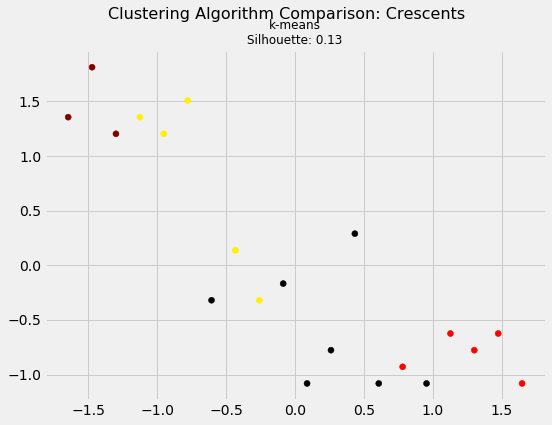

In [20]:
fig, (ax1) = plt.subplots(
     1, 1, figsize=(8, 6), sharex=True, sharey=True
)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {
    0: "#800000",
    1: "#FF0000",
    2: "#000000",
    3: "#FFF000"
}
# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
ax1.set_title(
     f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12}
)
plt.show()